<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier González Paredes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
<center><h5>https://github.com/JavierGonzalezP/EIE_401_MULTIMEDIA</h5></center>
 

## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


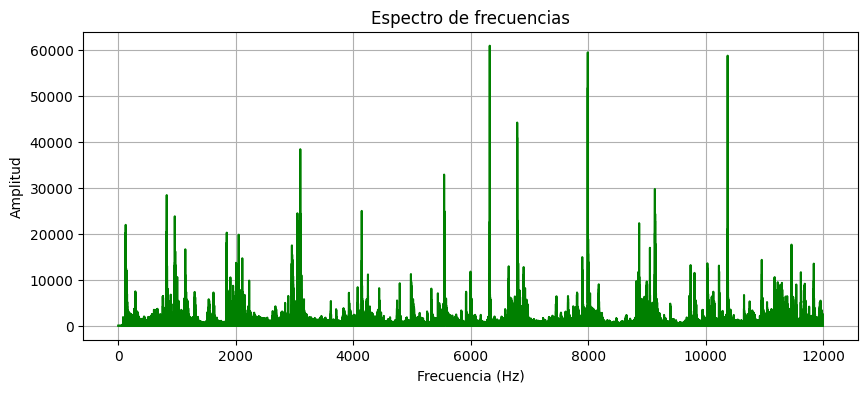

In [7]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Se carga el archivo de audio
sample_rate, data = wavfile.read("audio.wav")

# Se obtiene la duración del audio y el número de muestras
duration = len(data) / sample_rate
num_samples = len(data)

# Se calcula la transformada de Fourier
fft_output = np.fft.fft(data)
frequencies = np.fft.fftfreq(num_samples, 1 / sample_rate)

# Se toman solo las frecuencias positivas
positive_frequencies = frequencies[:num_samples // 2]
positive_fft_output = np.abs(fft_output[:num_samples // 2])

# Grafica del espectro de frecuencias
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, positive_fft_output, color = "green")
plt.title('Espectro de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


## 2. Obtén el espectrograma de tu señal de audio

h:\Python\Lib\site-packages\matplotlib\axes\_axes.py:7939: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


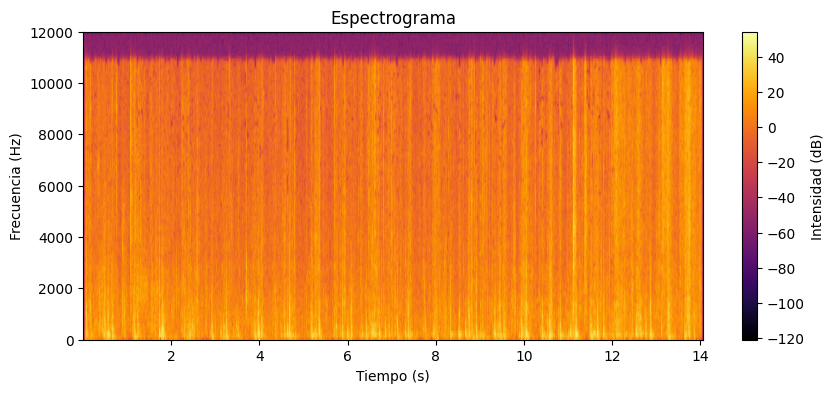

In [8]:
# Se toma solo un canal si el audio tiene múltiples canales
if len(data.shape) > 1:
    data = data[:, 0]

# Se obtiene el espectrograma
plt.figure(figsize=(10, 4))
plt.specgram(data, Fs=sample_rate, cmap='inferno')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Intensidad (dB)')
plt.show()

## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.


In [16]:
# Se define la funcion que creeara los slices
def slice_audio_signal(audio_data, sample_rate, slice_duration, overlap):
    samples_per_slice = int(sample_rate * slice_duration)   # Calcular el número de muestras por slice
    overlap_samples = int(sample_rate * overlap)            # Calcular el número de muestras de overlap
    slices = []                                             # Inicializar lista para almacenar los slices
    
    # Iterar sobre la señal de audio y tomar los slices con overlap
    start = 0
    while start < len(audio_data):
        end = min(start + samples_per_slice, len(audio_data))
        slice_data = audio_data[start:end]
        slices.append(slice_data)
        start += samples_per_slice - overlap_samples
    
    return slices

# Se carga el archivo de audio
sample_rate, audio_data = wavfile.read("audio.wav")

# Se define la duración temporal de cada slice y el overlap en segundos
slice_duration = 1.0    # Duración de cada slice en segundos
overlap_duration = 0.2  # Duración del overlap en segundos

# Se obtiene los slices de audio
slices = slice_audio_signal(audio_data, sample_rate, slice_duration, overlap_duration)

# Se imprimen el número de slices generados
print(f"Número de slices generados: {len(slices)}")

Número de slices generados: 18


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


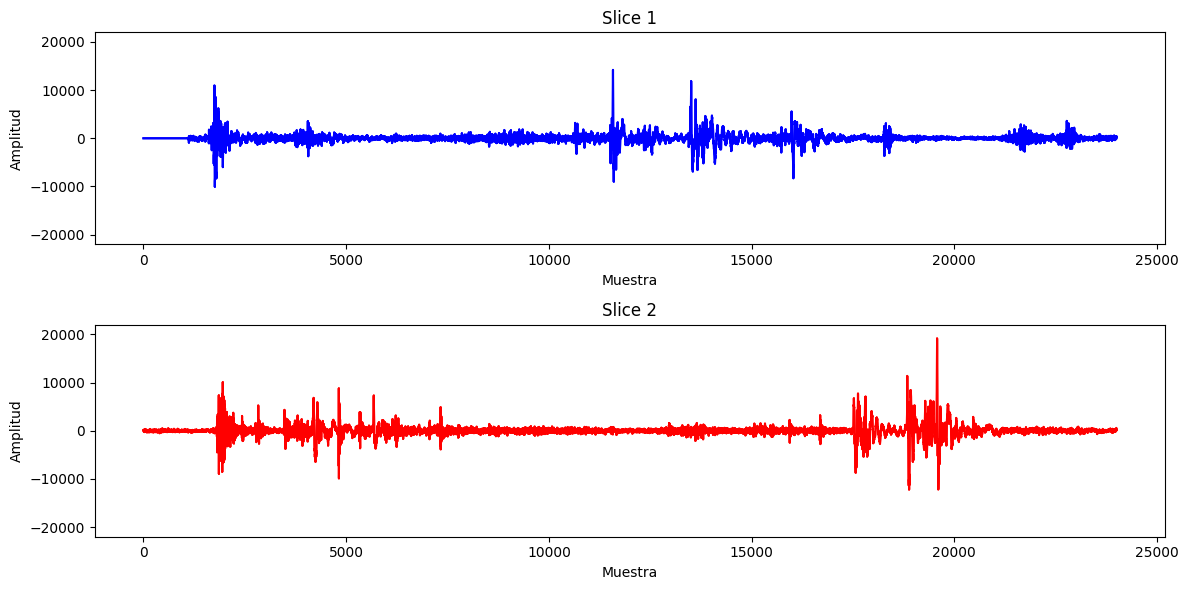

In [98]:
import numpy as np
import torch
import torchaudio
import soundfile as sf
import matplotlib.pyplot as plt


sample_rate, data = wavfile.read("audio.wav")           # Se carga el archivo de audio
audio_tensor = torch.tensor(data, dtype=torch.float32)  # Se convertir los datos de audio a un tensor de PyTorch

# Se define la duración de cada slice en segundos
slice_duration = 1.0  # Segundos
samples_per_slice = int(sample_rate * slice_duration)   # Se calculan el número de muestras por slice
total_slices = len(data) // samples_per_slice           # Se calcula el número total de slices

# Array para almacenar los slices
slices = []

# Se realiza el slicing de la señal
for i in range(total_slices):
    start = i * samples_per_slice
    end = (i + 1) * samples_per_slice
    slice_data = audio_tensor[start:end]
    slices.append(slice_data.numpy())  # Convierte el tensor a un array NumPy

# Se grafica un par de slices
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(slices[0], color='blue')
plt.title('Slice 1')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.ylim(-22000,22000)
plt.grid
plt.subplot(2, 1, 2)
plt.plot(slices[1], color='red')
plt.title('Slice 2')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.ylim(-22000,22000)
plt.grid
plt.tight_layout()
plt.show()

# Se guardan el audio original y un par de slices como archivos WAV
sf.write("audio_tensor.wav", data, sample_rate)
for i in range(2):
    sf.write(f"slice_{i+1}.wav", slices[i], sample_rate)


## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

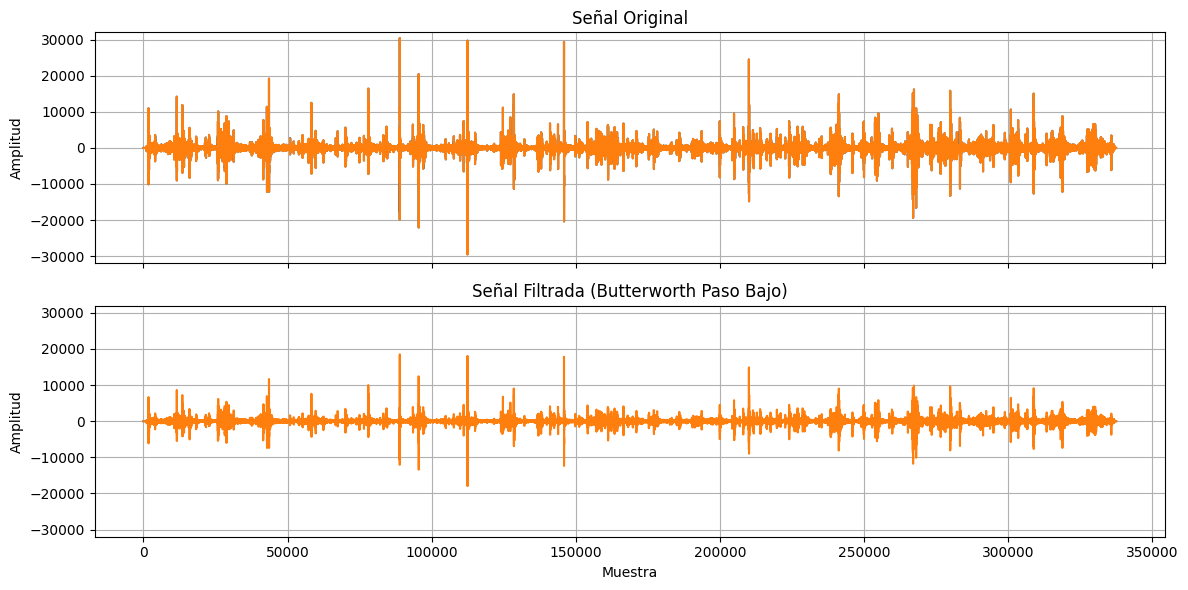

In [97]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Se define la función para diseñar el filtro butterworth
def butterworth_lowpass_filter(data, cutoff_freq, sample_rate, order=5):
    nyquist_freq = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Se define la frecuencia de corte del filtro Butterworth
cutoff_freq = 7500  # Hz

# Se aplica el filtro Butterworth
filtered_data = butterworth_lowpass_filter(data, cutoff_freq, sample_rate)

# Se crea la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Grafica de la señal original
ax1.plot(data, label='Señal original')
ax1.set_title('Señal Original')
ax1.set_ylabel('Amplitud')
ax1.set_ylim(-32000, 32000)
ax1.grid(True)

# Grafica de la señal filtrada
ax2.plot(filtered_data, label='Señal filtrada')
ax2.set_title('Señal Filtrada (Butterworth Paso Bajo)')
ax2.set_xlabel('Muestra')
ax2.set_ylabel('Amplitud')
ax2.set_ylim(-32000, 32000)
ax2.grid(True)

plt.tight_layout() # Ajusta el espaciado entre los subplots

Se define en el código una frecuencia de corte de 7500 Hz para el filtro pasa bajos Butterworth. Esto significa que las frecuencias por debajo de 7500 Hz pasarán por el filtro con poca atenuación, mientras que las frecuencias por encima de 7500 Hz serán atenuadas.
Al analizar la señal filtrada a partir del filtro Butterworth paso bajo con orden 5, se ha logrado reducir el ruido de alta frecuencia, mientras que conserva la estructura general de la onda. Por lo que, el filtro Butterworth con esta configuración ha actuado como un suavizado, eliminando las componentes de frecuencia más alta sin afectar significativamente la estructura principal de la señal.

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
